<a href="https://colab.research.google.com/github/fhydzaa/mycalories/blob/main/CALORIES_BURN_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Anggota Kelompok :

  21.11.4274	Faiq Hidayat Dzakwan

  21.11.4289	Ilham Ibnu Pranata

  21.11.4294	Fachrudin Okta Rahmawan

  21.11.4309	Fauzan Lutfi Muzaki

  21.11.4328	Muhammad Taqiyuddin


  


**A. EDA dan Visualisasi Data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_calories = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI/calories.csv')
df_exercise = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI/exercise.csv')

In [ ]:
#menggabungkan tabel 'calories.csv' dan 'exercise.csv' menjadi satu
df = pd.concat([df_exercise, df_calories['Calories']], axis=1)
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
#mengubah gender menjadi integer agar bisa dianalisis
df.replace({"Gender":{'male':0,'female':1}}, inplace=True)
df.head()

NameError: ignored

In [ ]:
#menampilkan jumlah baris dan kolom
df.shape

(15000, 9)

In [ ]:
#menampilkan info pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  int64  
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 1.0 MB


In [ ]:
#memastikan tidak ada data kosong
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [ ]:
#memastikan tidak ada data duplikat
df.duplicated().sum()

0

In [ ]:
#menampilkan beberapa info terkait mean, min, max dll
df.describe()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,0.503533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,0.500004,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,0.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,0.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,1.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,1.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,1.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [ ]:
#mengatur gaya (style) dari plot yang akan dibuat menggunakan Seaborn.
sns.set()

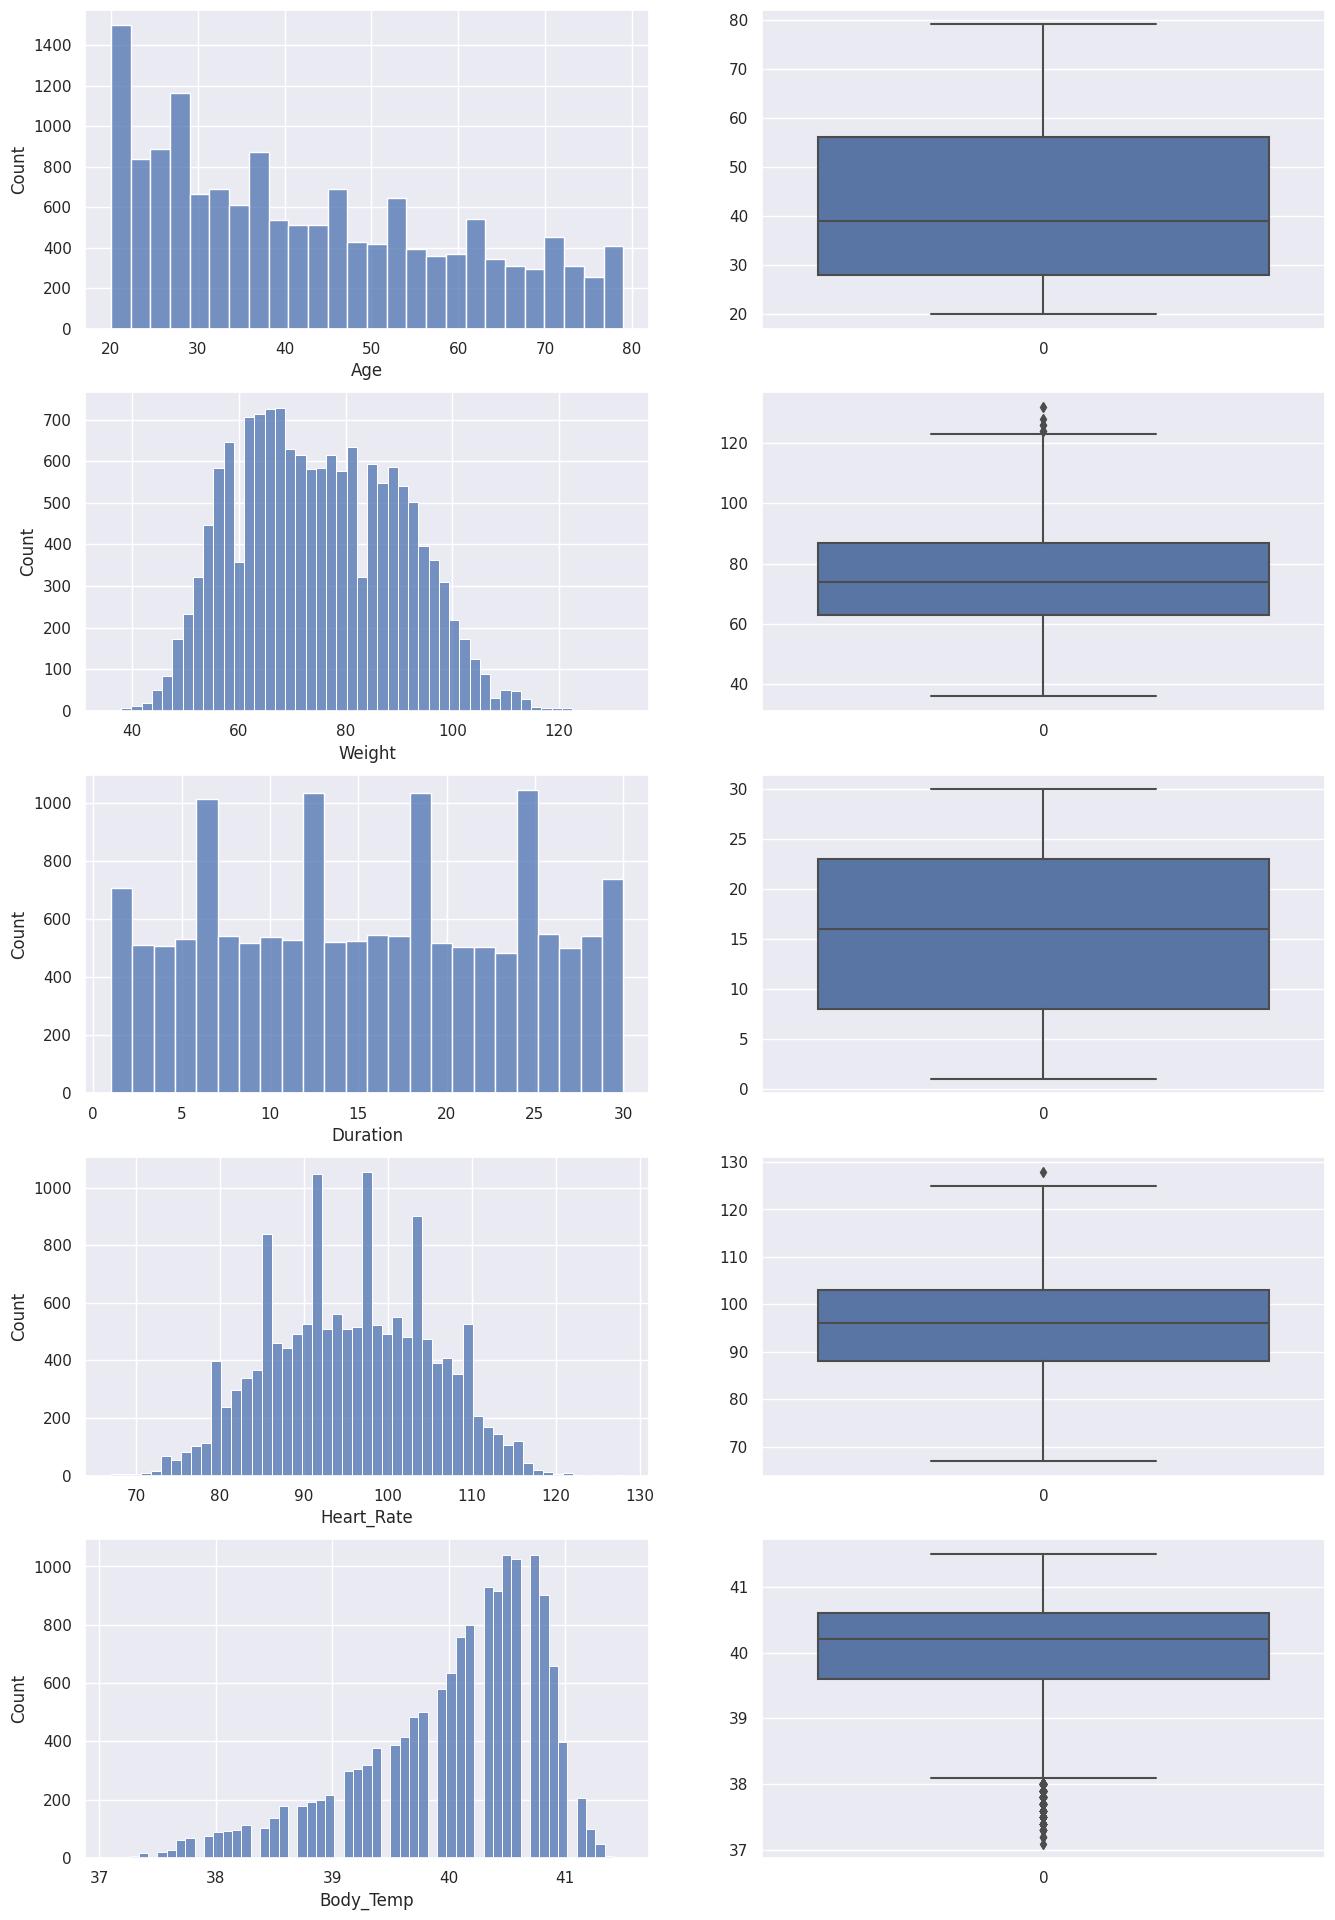

In [ ]:
#melihat ada tidaknya data outlier
plt.figure(figsize=(16,24))
plt.subplot(5,2,1)
sns.histplot(df['Age'])
plt.subplot(5,2,2)
sns.boxplot(df['Age'])
plt.subplot(5,2,3)
sns.histplot(df['Weight'])
plt.subplot(5,2,4)
sns.boxplot(df['Weight'])
plt.subplot(5,2,5)
sns.histplot(df['Duration'])
plt.subplot(5,2,6)
sns.boxplot(df['Duration'])
plt.subplot(5,2,7)
sns.histplot(df['Heart_Rate'])
plt.subplot(5,2,8)
sns.boxplot(df['Heart_Rate'])
plt.subplot(5,2,9)
sns.histplot(df['Body_Temp'])
plt.subplot(5,2,10)
sns.boxplot(df['Body_Temp'])
plt.show()

In [ ]:
#menghapus outlier pada kolom weight, heat rate, dan body temperature
Weight25 = df['Weight'].quantile(0.25)
Weight75 = df['Weight'].quantile(0.75)
Weight_IQR = Weight75 - Weight25
Weight_upper_limit = Weight75 + 1.5 * Weight_IQR
Weight_lower_limit = Weight25 - 1.5 * Weight_IQR
df['Weight'] = np.where(
  df['Weight'] > Weight_upper_limit,
    Weight_upper_limit,
    np.where(
      df['Weight'] < Weight_lower_limit,
        Weight_lower_limit,
      df['Weight']))

Heart_Rate25 = df['Heart_Rate'].quantile(0.25)
Heart_Rate75 = df['Heart_Rate'].quantile(0.75)
Heart_Rate_IQR = Heart_Rate75 - Heart_Rate25
Heart_Rate_upper_limit = Heart_Rate75 + 1.5 * Heart_Rate_IQR
Heart_Rate_lower_limit = Heart_Rate25 - 1.5 * Heart_Rate_IQR
df['Heart_Rate'] = np.where(
  df['Heart_Rate'] > Heart_Rate_upper_limit,
    Heart_Rate_upper_limit,
    np.where(
      df['Heart_Rate'] < Heart_Rate_lower_limit,
        Heart_Rate_lower_limit,
      df['Heart_Rate']))

Body_Temp25 = df['Body_Temp'].quantile(0.25)
Body_Temp75 = df['Body_Temp'].quantile(0.75)
Body_Temp_IQR = Body_Temp75 - Body_Temp25
Body_Temp_upper_limit = Body_Temp75 + 1.5 * Body_Temp_IQR
Body_Temp_lower_limit = Body_Temp25 - 1.5 * Body_Temp_IQR
df['Body_Temp'] = np.where(
  df['Body_Temp'] > Body_Temp_upper_limit,
    Body_Temp_upper_limit,
    np.where(
      df['Body_Temp'] < Body_Temp_lower_limit,
        Body_Temp_lower_limit,
      df['Body_Temp']))

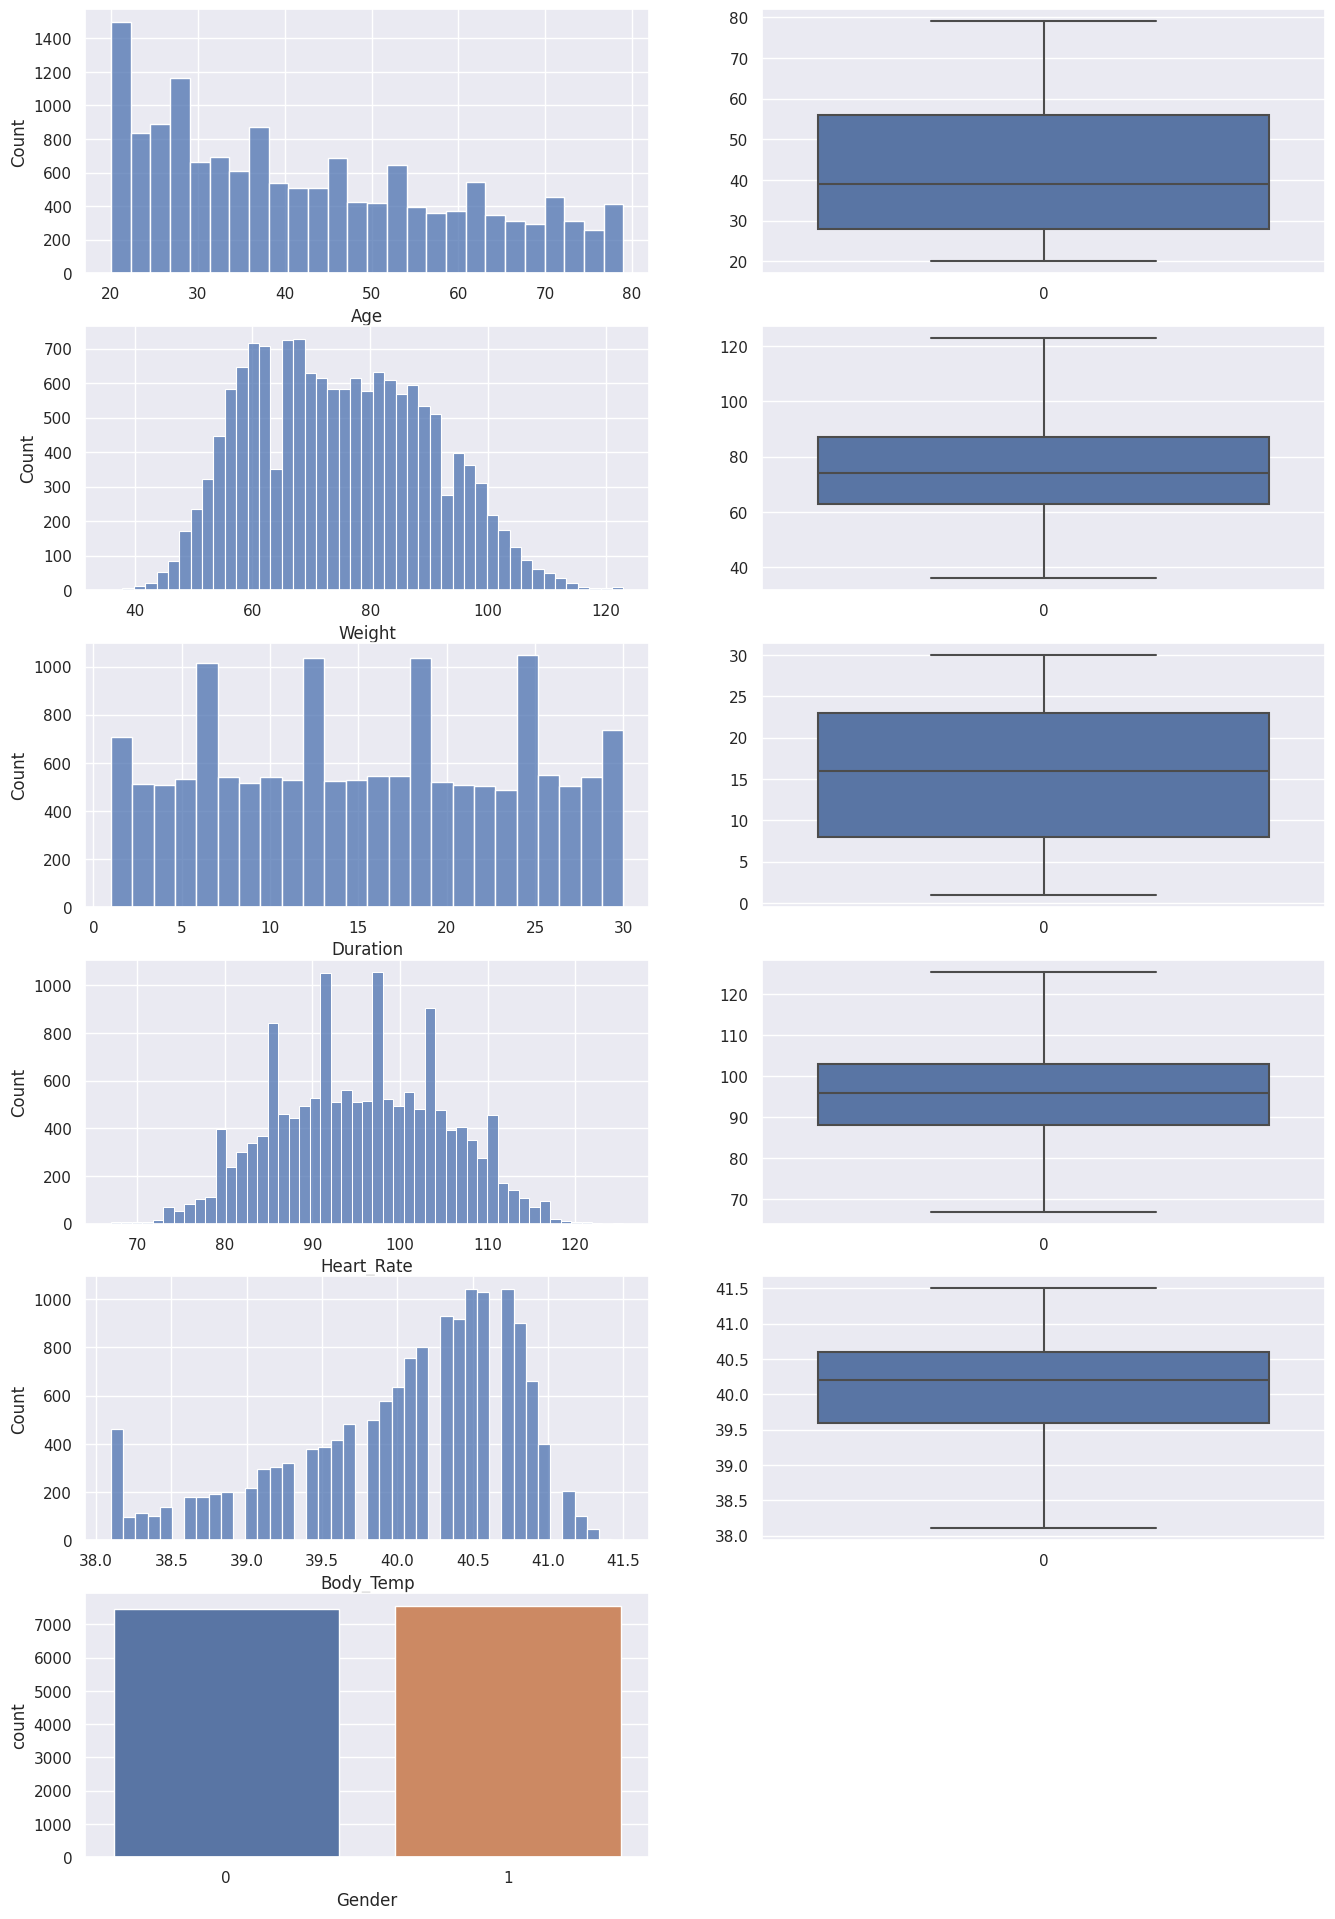

In [ ]:
#menampilkan kembali data setelah dilakukan proses penghapusan outlier
plt.figure(figsize=(16,24))
plt.subplot(6,2,1)
sns.histplot(df['Age'])
plt.subplot(6,2,2)
sns.boxplot(df['Age'])
plt.subplot(6,2,3)
sns.histplot(df['Weight'])
plt.subplot(6,2,4)
sns.boxplot(df['Weight'])
plt.subplot(6,2,5)
sns.histplot(df['Duration'])
plt.subplot(6,2,6)
sns.boxplot(df['Duration'])
plt.subplot(6,2,7)
sns.histplot(df['Heart_Rate'])
plt.subplot(6,2,8)
sns.boxplot(df['Heart_Rate'])
plt.subplot(6,2,9)
sns.histplot(df['Body_Temp'])
plt.subplot(6,2,10)
sns.boxplot(df['Body_Temp'])
plt.subplot(6,2,11)
sns.countplot(x='Gender', data=df)
plt.show()

**B. Analisis Korelasi**

In [ ]:
#menampilkan korelasi secara detail dengan tabel
df.corr()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,1.000000,0.000687,-0.001827,-0.013520,-0.011558,-0.002751,-0.000440,0.000909,-0.001661
Gender,0.000687,1.000000,-0.003222,-0.710534,-0.783347,-0.003440,-0.011538,-0.007236,-0.022357
Age,-0.001827,-0.003222,1.000000,0.009554,0.090159,0.013247,0.010493,0.012204,0.154395
Height,-0.013520,-0.710534,0.009554,1.000000,0.958466,-0.004625,0.000512,0.001536,0.017537
Weight,-0.011558,-0.783347,0.090159,0.958466,1.000000,-0.001792,0.004357,0.004308,0.035568
Duration,-0.002751,-0.003440,0.013247,-0.004625,-0.001792,1.000000,0.852887,0.911465,0.955421
Heart_Rate,-0.000440,-0.011538,0.010493,0.000512,0.004357,0.852887,1.000000,0.778540,0.897877
Body_Temp,0.000909,-0.007236,0.012204,0.001536,0.004308,0.911465,0.778540,1.000000,0.834175
Calories,-0.001661,-0.022357,0.154395,0.017537,0.035568,0.955421,0.897877,0.834175,1.000000


<Axes: >

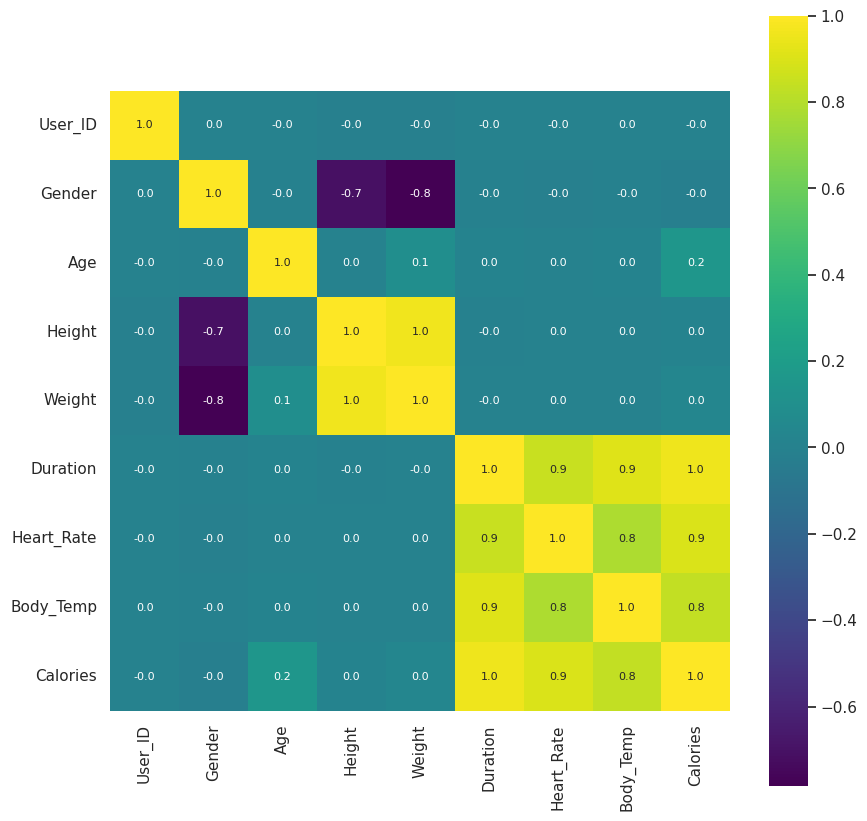

In [ ]:
#menampilkan korelasi agar mudah dilihat dengan heatmap
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(
    correlation,
    cbar=True,
    square=True,
    fmt='.1f',
    annot=True,
    annot_kws={'size':8},
    cmap='viridis')

**C. Membuat Model Regresi Linear**

In [ ]:
#memasukkan data dependen dan independen ke dalam variabel X dan Y
X = df.drop(columns=['User_ID','Calories','Height'], axis=1)
Y = df['Calories']

NameError: ignored

In [ ]:
print(X(0))

TypeError: ignored

In [ ]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [ ]:
#membuat variabel train dan test secara random dengan perbandingan 80 : 20
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X.shape, X_train.shape, X_test.shape)

(15000, 6) (12000, 6) (3000, 6)


In [ ]:
#memasukkan algoritma yang akan digunakan
# model = XGBRegressor() => algoritma untuk prediksi lebih maksimal (R-squared: 99.89 %)
model = XGBRegressor()
model.fit(X_train, Y_train)

LinearRegression()

**D. Evaluasi Model Linear**

In [ ]:
# data = ([1],[30],[77],[20],[111],[40])
data = ([1,30,77,20,111,40])

In [ ]:
#membuat variabel Y_pred untuk menyimpan data hasil prediksi
Y_pred = model.predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: ignored

In [ ]:
print(X_test)

In [ ]:
#melakukan evaluasi model menggunakan MAE
print('Mean Absolute Eror (MAE) : %.2f' % mean_absolute_error(Y_pred,Y_test))

In [ ]:
#melakukan evaluasi model menggunakan MSE
print('Mean Squared Error (MSE) : %.2f' % mean_squared_error(Y_pred , Y_test))

In [ ]:
#melakukan evaluasi model menggunakan MAPE
print('Root Mean Squared Error (RMSE) : %.2f' % np.sqrt( mean_squared_error(Y_pred , Y_test)))

In [ ]:
#melakukan evaluasi model menggunakan R-square
print('R-squared: %.2f' % ((r2_score(Y_test, Y_pred))*100), '%')

In [ ]:
Y_test = Y_test.reset_index(drop=True)

Y_pred = pd.DataFrame(Y_pred).rename({0:'Y_pred'},axis=1)
Y_pred['Y_test'] = Y_test

Y_pred.head(20)

In [ ]:
import pickle
pickle.dump(model, open("model.pkl","wb"))